E commerce company aims to know  customer retention and improve customer loyalty.I want to develop a machine learning model that can predict the likelihood  of a customer remaining active with our platform.This will allow the company to identify customers who are at risk of leaving and target them with personalized promotions or offers to encourage them to stay

I have access to dataset that contains customer information.

link :

In [1]:
## import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## dataset descrription
description = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
description


,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [3]:
## read the dataset
data = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Data Exploratory Analysis

In [4]:
## shape of the data
data.shape

(5630, 20)

In [5]:
## number of null values
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

It can be observed from above that, the dataset has 5630 rows and 20 columns.Moreover we can observed that the dataset has some of it variables containing missing values.

In [6]:
## The number of retention
data['Churn'].value_counts()


0    4682
1     948
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Number of retention')

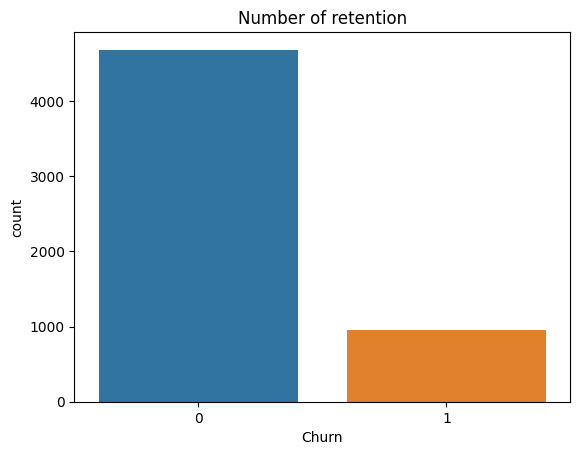

In [7]:
sns.countplot(x = 'Churn', data=data)
plt.title('Number of retention')

It can be observed from the above plot that th number of retention is greater as compare to the number of people leaving and that makes our data imbalance

Distribution Check on Categorical **Variable**

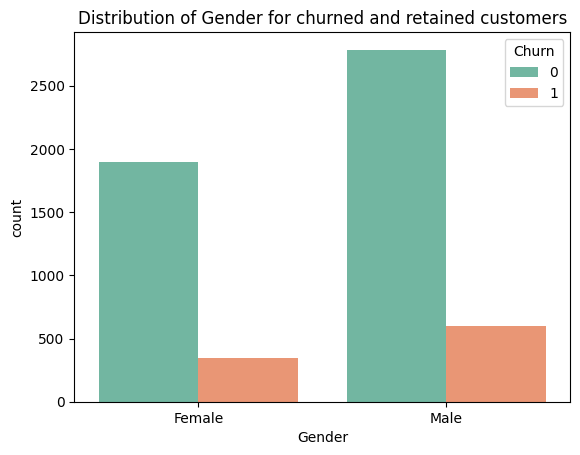

In [8]:
## Distribution Check
sns.countplot(x='Gender', hue='Churn', palette='Set2', data=data)
plt.title("Distribution of Gender for churned and retained customers")
plt.show()

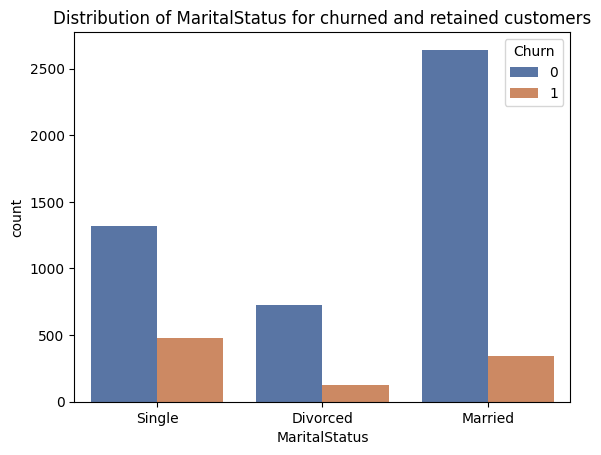

In [9]:
sns.countplot(x='MaritalStatus', hue='Churn', palette='deep', data=data)
plt.title("Distribution of MaritalStatus for churned and retained customers")
plt.show()

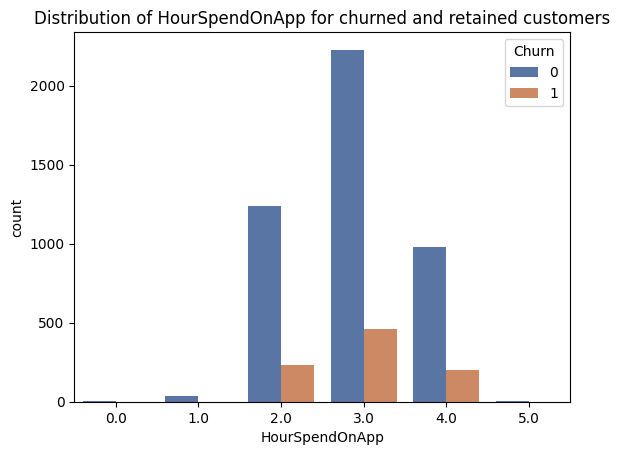

In [10]:
sns.countplot(x='HourSpendOnApp', hue='Churn', palette='deep', data=data)
plt.title("Distribution of HourSpendOnApp for churned and retained customers")
plt.show()

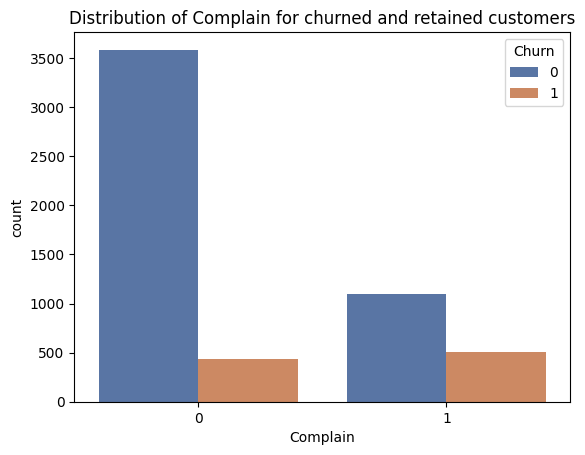

In [11]:
sns.countplot(x='Complain', hue='Churn', palette='deep', data=data)
plt.title("Distribution of Complain for churned and retained customers")
plt.show()

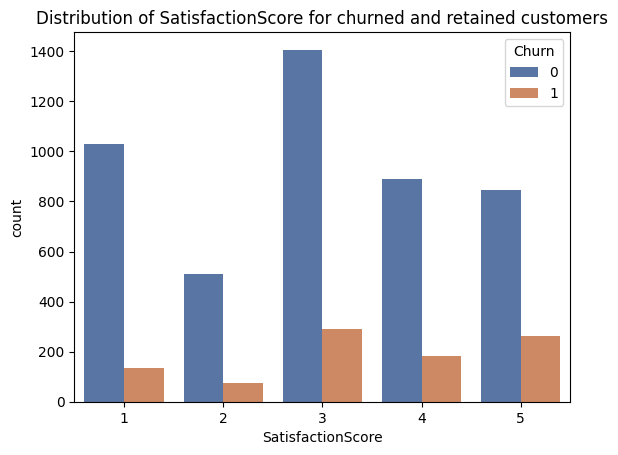

In [12]:
sns.countplot(x='SatisfactionScore', hue='Churn', palette='deep', data=data)
plt.title("Distribution of SatisfactionScore for churned and retained customers")
plt.show()

In [13]:
data['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

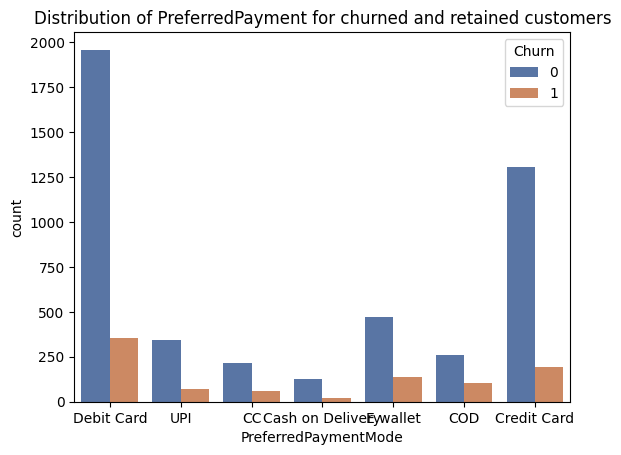

In [14]:
sns.countplot(x='PreferredPaymentMode', hue='Churn', palette='deep', data=data)
plt.title("Distribution of PreferredPayment for churned and retained customers")
plt.show()

**Realisation**

From the above graphical findings:

1. Most of the customers spend 3 hours on the app, and 94.75% of the customers spend between 2 and 4 hours on the app
2. Single people have higher churn rate than other Marital Status
3. Customers with complain have higher churn rate than customers without complain
4. Customers with Debit Card payment mode have higher churn rate than customers with other payment mode
5. Customers with 3 and 5 satisfaction score have higher churn rate than other satisfaction score

Distribution of Continuous Variable

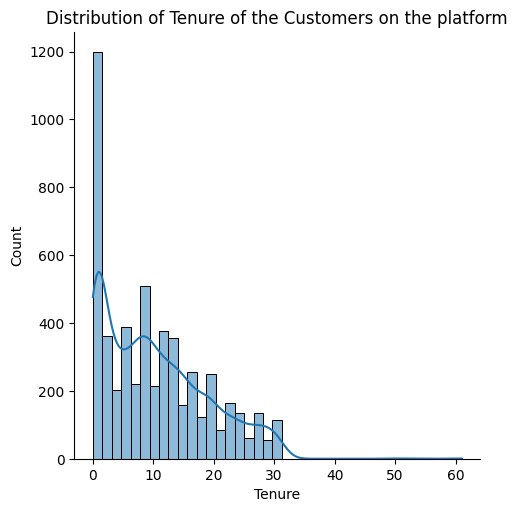

In [15]:
sns.displot(x='Tenure', kde=True, data=data)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

In [16]:
## outliers check on Tenure
## outliers are values that do not conform to the code of conduct

import numpy as np

# Calculate the first and third quartiles and IQR
q1 = np.percentile(data['Tenure'], 25)
q3 = np.percentile(data['Tenure'], 75)
iqr = q3 - q1

# Define the upper and lower bounds for outliers
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

# Identify outliers
outliers = data[(data['Tenure'] > upper_bound) | (data['Tenure'] < lower_bound)]
outliers



,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


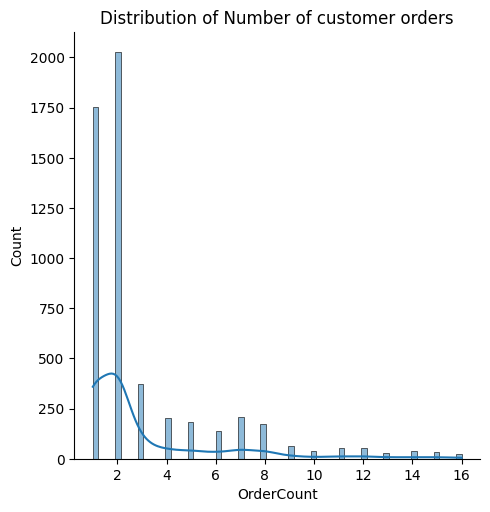

In [17]:
## Distribution of Order count of customers
sns.displot(x='OrderCount', kde=True, data=data)
plt.title("Distribution of Number of customer orders")
plt.show()

In [18]:
## outliers check on Tenure
## outliers are values that do not conform to the code of conduct

import numpy as np

# Calculate the first and third quartiles and IQR
q1 = np.percentile(data['OrderCount'], 25)
q3 = np.percentile(data['OrderCount'], 75)
iqr = q3 - q1

# Define the upper and lower bounds for outliers
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

# Identify outliers
outliers = data[(data['OrderCount'] > upper_bound) | (data['OrderCount'] < lower_bound)]
outliers


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


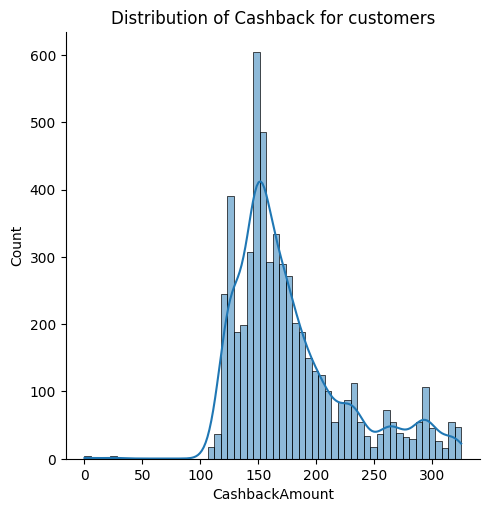

In [19]:
## Distribution of Cashback for customers
sns.displot(x='CashbackAmount',kde=True, data=data)
plt.title('Distribution of Cashback for customers')
plt.show()

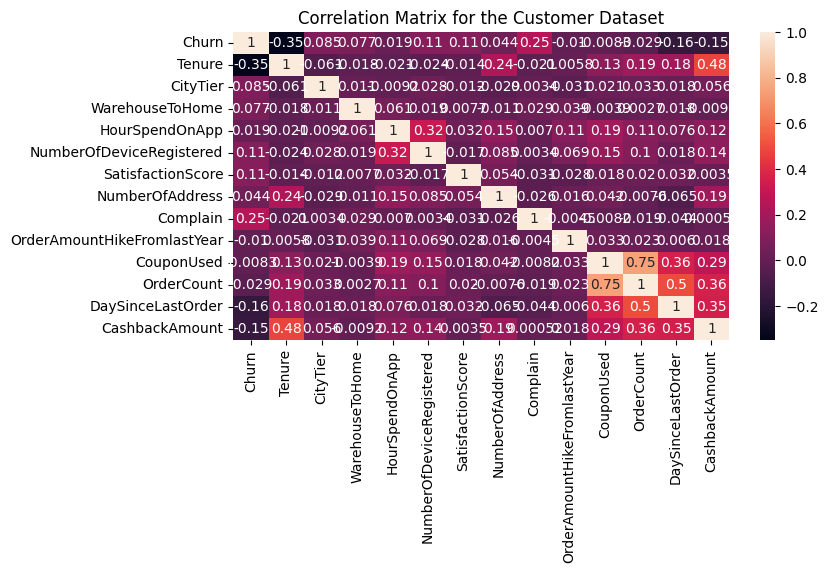

In [20]:
## check of correlation amoung variables
plt.figure(figsize=(8,4))
sns.heatmap(data.drop('CustomerID',axis=1).corr(), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

Data Preprocessing

In here we are going to look at:

1.Data cleaning(Handling of missing values)

2.Data Transformation(Encoding categorical variable and Normalization

3.Feature Selection



***Handling of Missing Value***

In [24]:
## check Numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  15


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,11.0,1.0,1.0,3.0,129.60


In [25]:
## check numerical missing values
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean(),4)))

Tenure: 0.0469% missing value
WarehouseToHome: 0.0446% missing value
HourSpendOnApp: 0.0453% missing value
OrderAmountHikeFromlastYear: 0.0471% missing value
CouponUsed: 0.0455% missing value
OrderCount: 0.0458% missing value
DaySinceLastOrder: 0.0545% missing value


In [35]:

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    
    ## create a new feature to capture nan values
    ##data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
    
data[numerical_with_nan].isnull().sum()
    

Series([], dtype: float64)

In [36]:
## check Categorical variables
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

print('Number of numerical variables: ', len(categorical_features))

# visualise the numerical variables
data[categorical_features].head()

Number of numerical variables:  5


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


In [37]:
## check Categorical missing values
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean(),4)))

The categorical variable do not have missing values

In [38]:
## check missing values
data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

From above we can verify that all misssing values has been checked


**Encoding Categorical Variable**

In [49]:
## check categorical data
categorical_data = data.select_dtypes(include='object')
categorical_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [51]:
categorical_encoded= pd.get_dummies(categorical_data,drop_first=True)
categorical_encoded

,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5626,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5627,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
5628,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [52]:
categorical_data.columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [53]:
final_data = pd.concat([data.drop(categorical_data.columns, axis=1), categorical_encoded], axis=1)
final_data.drop('CustomerID', axis=1,inplace=True)

In [54]:
final_data

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,0,0,0,0,1,0,0,0,0,1
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,0,1,1,0,0,1,0,0,0,1
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0,0,1,0,1,0,0,0,0,1
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,3.0,2,1,6,0,18.0,...,0,0,1,0,1,0,0,0,1,0
5626,0,13.0,1,13.0,3.0,5,5,6,0,16.0,...,0,0,1,0,0,0,0,0,1,0
5627,0,1.0,1,11.0,3.0,2,4,3,1,21.0,...,0,0,1,0,1,0,0,0,1,0
5628,0,23.0,3,9.0,4.0,5,4,4,0,15.0,...,0,0,1,0,1,0,0,0,1,0


Model Building

In [58]:
## Split data into training and testing
from sklearn.model_selection import train_test_split
X=final_data.drop(['Churn'],axis=1)
y=final_data['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


In [91]:
X_train

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
1294,15.0,1,24.0,2.0,3,5,7,1,17.0,0.0,...,0,0,1,0,1,0,0,0,1,0
3904,18.0,1,9.0,4.0,2,1,3,1,20.0,7.0,...,0,0,0,0,0,0,0,0,1,0
3523,1.0,1,13.0,3.0,5,3,3,0,14.0,3.0,...,0,0,1,0,0,0,1,0,0,0
2100,18.0,3,17.0,2.0,3,1,4,0,13.0,1.0,...,0,0,0,1,0,0,0,0,1,0
4481,5.0,3,14.0,4.0,4,1,6,0,13.0,1.0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,28.0,3,9.0,3.0,5,3,8,0,12.0,7.0,...,0,0,0,0,0,0,0,0,1,0
3264,8.0,1,7.0,4.0,2,2,4,0,17.0,1.0,...,0,0,0,0,0,0,1,0,0,1
1653,30.0,1,6.0,2.0,5,3,3,1,13.0,1.0,...,0,0,1,0,1,0,0,0,1,0
2607,6.0,1,14.0,2.0,4,3,10,1,16.0,1.0,...,0,0,1,0,0,1,0,0,1,0


Use xgboost

In [70]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

# Train the XGBoost classifier
xgb_clf.fit(X_train, y_train)

# Evaluate the XGBoost classifier
y_pred = xgb_clf.predict(X_test)



Accuracy: 0.9049733570159858


In [71]:
from sklearn.metrics import f1_score
# Compute the F1 score of the classifier
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")


F1 score: 0.6747720364741641


use Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
# Define the Random Forest classifier
randomM = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Train the Random Forest classifier
randomM.fit(X_train, y_train)

# Evaluate the Random Forest classifier
y_pred = randomM.predict(X_test)



Accuracy: 0.844582593250444


In [76]:
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

F1 score: 0.1206030150753769


hyperparameter tuning of Random Forest

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]})

In [78]:
print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [81]:
randomM1 = RandomForestClassifier(max_depth=6, min_samples_leaf=1,
                             min_samples_split=6,
                             n_estimators=200,
                             random_state=0)
randomM1.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=6, n_estimators=200,
                       random_state=0)

In [82]:
y_pred = randomM1.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

F1 score: 0.5343511450381679


hyperparameter tuning of xgboost

In [83]:
param_grid={'xgb__eta': (0.01,0.3),
       'xgb__max_depth': (5,11),
      'xgb__subsample': (0.4,1),
      'xgb__n_estimators': (100,250),
      'xgb__gamma':(0,5),
      'xgb__colsample_bytree':(0.4,1),
      'xgb__min_child_weight': (0.3,1)}

xgbM = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgbM, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")


[12:36:41] WARNING: ../src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__eta", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__subsample" } are not used.

Best hyperparameters: {'xgb__colsample_bytree': 0.4, 'xgb__eta': 0.01, 'xgb__gamma': 0, 'xgb__max_depth': 5, 'xgb__min_child_weight': 0.3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.4}


In [84]:
xgbM1 = xgb.XGBClassifier(**grid_search.best_params_,random_state=42)
xgbM1.fit(X_train, y_train)

[12:48:22] WARNING: ../src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__eta", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__subsample" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [85]:
y_pred = xgbM1.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

F1 score: 0.9281767955801105


from the above model selection and trainig, we can observed that xgboost is perfoming well on the training data with an accuracy of 0.928 as compared to random forest with an accuracy of 0.534

save your Machine Learning Model

In [90]:
import pickle
filename = '/content/xgb_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(xgbM1, f)


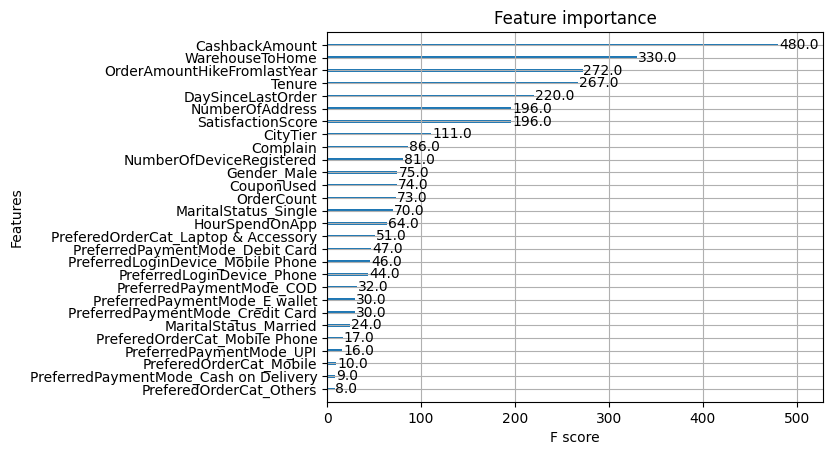

In [88]:
xgb.plot_importance(xgbM1)
plt.show()

using the best 10 features from the xgboost feature importance to build new model for purpose of feature reduction

In [97]:
X = data[['CashbackAmount','WarehouseToHome','OrderAmountHikeFromlastYear','Tenure','DaySinceLastOrder',
            'NumberOfAddress','SatisfactionScore','CityTier','Complain','NumberOfDeviceRegistered']]
y = data['Churn']

In [98]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


In [99]:
xgbM2 = xgb.XGBClassifier(**grid_search.best_params_,random_state=42)
xgbM2.fit(X_train, y_train)

[13:42:15] WARNING: ../src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__eta", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__subsample" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [100]:
y_pred = xgbM2.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

F1 score: 0.9023746701846965


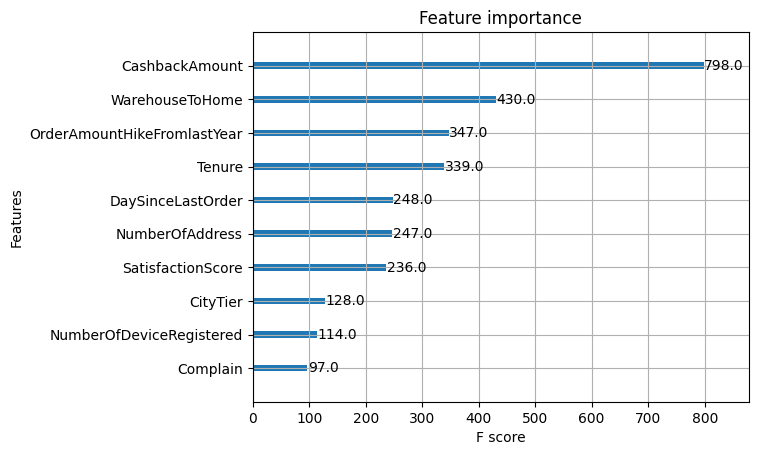

In [101]:
xgb.plot_importance(xgbM2)
plt.show()

In [102]:
import pickle
filename = '/content/xgb_model2.pkl'
with open(filename, 'wb') as f:
    pickle.dump(xgbM2, f)